# 初识Pytorch

In [1]:
import torch

torch.Tensor(3, 3)

tensor([[4.2194e-08, 4.0274e-11, 6.4097e-10],
        [4.0274e-11, 6.7013e-10, 4.0274e-11],
        [6.4097e-10, 4.0274e-11, 6.4833e-10]])

In [2]:
import numpy as np

a = np.array([[1, 2], [3, 4]])
print(type(a))
b = torch.from_numpy(a)
b

<class 'numpy.ndarray'>


tensor([[1, 2],
        [3, 4]])

In [3]:
type(b)

torch.Tensor

In [4]:
a = torch.Tensor(3, 4, 5, 8)
a.shape

torch.Size([3, 4, 5, 8])

In [5]:
a[0]

tensor([[[4.1722e+00, 4.5588e-41, 4.1722e+00, 4.5588e-41, 1.4768e-36,
          0.0000e+00, 1.4768e-36, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 1.4768e-36, 0.0000e+00, 1.4013e-45,
          0.0000e+00, 1.4768e-36, 0.0000e+00],
         [3.3631e-44, 0.0000e+00, 1.3944e+00, 4.5588e-41, 2.8026e-45,
          4.5588e-41, 2.8026e-45, 5.6052e-45],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 1.4013e-45, 3.3631e-44,
          1.4013e-45, 5.7738e-05, 4.5588e-41],
         [1.4013e-45, 4.5588e-41, 1.4013e-45, 4.5588e-41, 1.4013e-45,
          5.6052e-45, 1.4013e-45, 1.2612e-44]],

        [[2.9427e-44, 1.2612e-44, 1.4768e-36, 0.0000e+00, 7.6191e-03,
          4.5588e-41, 1.4013e-45, 4.5588e-41],
         [1.4013e-45, 5.6052e-45, 1.4013e-45, 2.2421e-44, 5.6052e-45,
          0.0000e+00, 1.4768e-36, 0.0000e+00],
         [1.4768e-36, 0.0000e+00, 1.4768e-36, 0.0000e+00, 1.4768e-36,
          0.0000e+00, 2.8026e-44, 0.0000e+00],
         [1.3712e-38, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.80

## 零维标量

In [6]:
a = np.random.rand(1)
a

array([0.37092531])

In [7]:
b = torch.Tensor(a)
b

tensor([0.3709])

In [8]:
b = torch.from_numpy(a)
b

tensor([0.3709], dtype=torch.float64)

In [9]:
type(a)

numpy.ndarray

In [10]:
b.size()

torch.Size([1])

## 一维向量

In [11]:
scores = torch.Tensor([88, 89, 91, 91, 99, 100])
scores.size()

torch.Size([6])

In [12]:
scores

tensor([ 88.,  89.,  91.,  91.,  99., 100.])

## 二维矩阵

In [13]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris["data"]
iris_data.shape

(150, 4)

In [14]:
iris_tensor = torch.from_numpy(iris_data)
iris_tensor.size()

torch.Size([150, 4])

In [15]:
iris_tensor[:4, :]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000]], dtype=torch.float64)

## 三维立方体

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

pytorch = np.array(Image.open(
    "./Learn-Pytorch-And-Become-A-Data-Scientist-master/chapter1/imgs/pytorch.jpg").resize((224, 224)))
pytorch.shape

(224, 224, 3)

In [17]:
pytorch_tensor = torch.from_numpy(pytorch)
pytorch_tensor.size()

torch.Size([224, 224, 3])

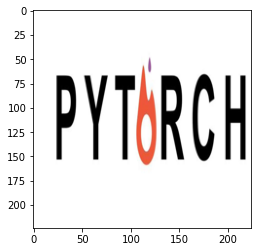

In [18]:
plt.imshow(pytorch)

## 四维多立方体

相册就是多张图片的叠加，最常见的形式为[batch, channel, width, height]

## 五维表示多个四维Tensor的叠加

视频按帧数划分，如50fps，如果一个视频的时长为1min，每个单位事件有50张图片，共有60个这样的单位时间， frames=60， 那么其表现形式为[frames, batch, channel, width, height]

## Variable(deprecated)

In [19]:
from torch.autograd import Variable

a = torch.FloatTensor(3, 3)
b = Variable(a)  # 接收Tensor类型的参数

In [20]:
b.data

tensor([[6.7333e+22, 1.7591e+22, 1.7184e+25],
        [4.3222e+27, 6.1972e-04, 7.2443e+22],
        [1.7728e+28, 7.0367e+22, 2.4174e-06]])

In [21]:
b.grad

In [22]:
b.grad_fn

In [23]:
type(b)

torch.Tensor

## 自动微分

In [24]:
a = torch.randn(2, 3)
a

tensor([[ 0.9443,  0.8049, -1.0090],
        [-0.2757, -0.2075,  0.7000]])

In [25]:
a.requires_grad

False

In [26]:
b = torch.rand((2, 3), requires_grad=True)
b

tensor([[0.0417, 0.5422, 0.7609],
        [0.0218, 0.8042, 0.2251]], requires_grad=True)

In [27]:
b.requires_grad

True

In [28]:
x = torch.randn(2, 3)
y = torch.randn(2, 3)
w = x + y
w.requires_grad

False

In [29]:
z = torch.randn((2, 3), requires_grad=True)
e = a + z
e.requires_grad

True

In [30]:
import torchvision

resnet18_model = torchvision.models.resnet18(pretrained=True)
for param in resnet18_model.parameters():
    param.requires_grad = False

In [31]:
resnet18_model.fc = torch.nn.Linear(512, 2)
optimizer = torch.optim.SGD(resnet18_model.fc.parameters(), lr=1e-2)

## 塔珀自指公式：

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/5e4c7a30f3dc20c06057413aed7c89b7e1c67aeb)

In [32]:
a = torch.DoubleTensor([106])
b = torch.DoubleTensor([9876778954322])


def tupper(x, y):
    assert isinstance(x, torch.DoubleTensor)
    assert isinstance(y, torch.DoubleTensor)
    return 1/2<torch.floor((torch.floor(y/17)*torch.pow(2, (-17*torch.floor(x)-torch.floor(y)%17)))%2)


tupper(a, b)

tensor([False])

In [33]:
def tupper_numpy(x,y):
    assert isinstance(x,torch.DoubleTensor)
    assert isinstance(y,torch.DoubleTensor)
    return 1/2<np.floor((np.floor(y/17)*np.power(2,(-17*np.floor(x)-np.floor(y)%17)))%2)


tupper_numpy(a,b)

tensor([False])

## Salary Prediction

In [34]:
import pandas as pd

df = pd.read_csv("~/Documents/Learn_Pytorch_datasets/chapter1/datas/salarys.csv",encoding='utf8')

In [35]:
df.columns.values

array(['专业', '学历编码', '专业编码', '高薪专业', '热门专业', '纬度', '经度', '专科', '本科',
       '双一流', '211', 'C9', 'Top2', '985', '省份', '省份编码', '城市', '薪酬',
       '综合能力'], dtype=object)

In [36]:
df.head()

,专业,学历编码,专业编码,高薪专业,热门专业,纬度,经度,专科,本科,双一流,211,C9,Top2,985,省份,省份编码,城市,薪酬,综合能力
0,其他,2,1703,0,0,41.0,123,1,0,0,0,0,0,0,辽宁省,24,大连市,5531.999,21.700512
1,轮机工程,11,517,0,0,31.0,121,0,2,0,0,0,0,0,NaN,33,NaN,20783.795,79.545020
2,中药学,2,57,0,1,31.0,121,0,2,3,0,0,0,0,北京市,31,北京市,5902.643,25.959380
3,艺术设计,2,9,0,1,42.0,86,0,0,0,0,0,0,0,四川省,27,成都市,9718.143,61.326324
4,统计学,2,297,0,1,45.0,126,1,0,0,0,0,0,0,黑龙江省,15,哈尔滨市,11063.998,67.979126


In [37]:
df.count()

专业      255516
学历编码    255516
专业编码    255516
高薪专业    255516
热门专业    255516
纬度      255494
经度      255516
专科      255516
本科      255516
双一流     255516
211     255516
C9      255516
Top2    255516
985     255516
省份      149945
省份编码    255516
城市      149945
薪酬      255516
综合能力    255516
dtype: int64

In [38]:
len(set(df["学历编码"].values))

12

In [39]:
len(set(df["专业编码"].values))

194

In [40]:
len(set(df["纬度"].values))

55

In [41]:
len(set(df["经度"].values))

46

In [42]:
len(set(df["省份编码"].values))

32

In [43]:
series = pd.Series(list(set(df["学历编码"].values)))
pd.get_dummies(series).T

,0,1,2,3,4,5,6,7,8,9,10,11
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
del df['专业']
del df['省份']
del df['城市']

df_xl = pd.get_dummies(df["学历编码"])
df_zy = pd.get_dummies(df["专业编码"])
df_wd = pd.get_dummies(df['纬度'])
df_jd = pd.get_dummies(df['经度'])
df_sf = pd.get_dummies(df["省份编码"])

df = pd.concat([df, df_xl, df_zy, df_wd, df_jd, df_sf], axis=1)

del df['学历编码']
del df['专业编码']
del df['纬度']
del df['经度']
del df['省份编码']

In [45]:
df.head()

,高薪专业,热门专业,专科,本科,双一流,211,C9,Top2,985,薪酬,...,23,24,25,26,27,28,29,30,31,33
0,0,0,1,0,0,0,0,0,0,5531.999,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,20783.795,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,2,3,0,0,0,0,5902.643,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,9718.143,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,11063.998,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.describe()

,高薪专业,热门专业,专科,本科,双一流,211,C9,Top2,985,薪酬,...,23,24,25,26,27,28,29,30,31,33
count,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.00000,255516.000000,255516.000000,...,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000,255516.000000
mean,0.208633,0.843759,0.234263,1.162049,0.334077,0.298666,0.037822,0.01270,0.124407,7643.924622,...,0.017173,0.015408,0.016837,0.029008,0.022304,0.029673,0.049496,0.106068,0.201753,0.413168
std,0.406332,0.363084,0.423538,0.986785,0.943730,0.898221,0.387113,0.25167,0.598118,3799.981461,...,0.129916,0.123169,0.128659,0.167829,0.147670,0.169685,0.216901,0.307925,0.401309,0.492403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2347.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5184.629000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6402.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8536.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000,5.00000,3.000000,28690.324000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
def z_score(series):
    _mean = series.sum() / series.count()
    print(_mean)
    std = (((series - _mean) ** 2).sum() / (series.count() - 1)) ** 0.5
    print(std)
    new_series = (series - _mean) / std
    return new_series

In [48]:
dd = df['综合能力']

In [49]:
new_series = z_score(dd)

37.07904970227501
21.75875929994074


In [50]:
df['综合能力'] = new_series

print(df['综合能力'].mean())
print(df['综合能力'].std())

-9.763441605432583e-17
0.9999999999999999


In [51]:
df.to_csv("salary_handled.csv",encoding='utf8',index=None)

## 使用Pytorch构建神经网络

In [52]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 20), 
    nn.ReLU(), 
    nn.Linear(20, 2))
model

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=2, bias=True)
)

In [53]:
class SimpleLayerNet(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(SimpleLayerNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        h_relu = self.relu(self.linear1(x).clamp(min=0))
        y_pred = self.linear2(h_relu)
        return y_pred

In [54]:
model = SimpleLayerNet(10, 20, 2)
model

SimpleLayerNet(
  (linear1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=20, out_features=2, bias=True)
)

### 训练集和测试集的划分

In [55]:
df = pd.read_csv("salary_handled.csv", encoding='utf8')

In [56]:
df.head()

,高薪专业,热门专业,专科,本科,双一流,211,C9,Top2,985,薪酬,...,23,24,25,26.1,27,28.1,29,30,31,33
0,0,0,1,0,0,0,0,0,0,5531.999,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,20783.795,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,2,3,0,0,0,0,5902.643,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,9718.143,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,11063.998,...,0,0,0,0,0,0,0,0,0,0


In [57]:
target = df["薪酬"]
del df["薪酬"]

In [58]:
size = target.count()
size

255516

In [59]:
np.random.seed(1314)
index = np.random.permutation(np.arange(size))
index.size

255516

In [60]:
train_X = df.iloc[index[:200000]]
test_X = df.iloc[index[200000:]]
train_Y = target.iloc[index[:200000]]
test_Y = target.iloc[index[200000:]]

In [61]:
class SalaryNet(nn.Module):
    
    def __init__(self, in_size, h1_size, h2_size, out_size):
        super(SalaryNet, self).__init__()
        self.h1 = nn.Linear(in_size, h1_size)
        self.relu = nn.ReLU()
        self.h2 = nn.Linear(h1_size, h2_size)
        self.out = nn.Linear(h2_size, out_size)
        
    def forward(self, x):
        h1_relu = self.relu(self.h1(x))
        h2_relu = self.relu(self.h2(h1_relu))
        predict = self.out(h2_relu)
        return predict

In [62]:
salarymodel = SalaryNet(327, 100, 20, 1)
salarymodel

SalaryNet(
  (h1): Linear(in_features=327, out_features=100, bias=True)
  (relu): ReLU()
  (h2): Linear(in_features=100, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
)

In [63]:
criterion = nn.MSELoss()

In [64]:
optimizer = torch.optim.Adam(salarymodel.parameters(), 0.001)

In [65]:
train_X.values

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [66]:
train_X.iloc[:10].values

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [67]:
train_X[:10].values

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [68]:
type(train_X.values)

numpy.ndarray

In [69]:
from torch.nn import init
import math
import time

batch_size = 512
epoch = 2

model = SalaryNet(327, 100, 20, 1)

# 初始化权重参数
for layer in model.modules():
    if isinstance(layer, nn.Linear):
        init.xavier_normal_(layer.weight)
        
optimizer = torch.optim.Adam(model.parameters(), 0.001)
criterion = nn.MSELoss()

loss_holder = []
blocks = math.ceil(train_Y.count() / batch_size)
loss_value = np.inf
step = 0
for i in range(epoch):
    train_count = 0
    batches = 0
    for j in range(blocks):
        train_x_data = torch.Tensor(train_X.iloc[j*batch_size:(j+1)*batch_size].values)
        train_x_data.requires_grad = True
        train_y_data = torch.Tensor(train_Y.iloc[j*batch_size:(j+1)*batch_size].values)
        out = model(train_x_data)
        loss = criterion(out.squeeze(1), train_y_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('epoch: {}, Train Loss: {:.6f}, Mean: {:.2f}, Min: {:.2f}, Max: {:.2f}, Median: {:.2f}, Dealed/Records: {}/{}'. \
                    format(i, math.sqrt(loss / batch_size), out.mean(), out.min(), out.max(), out.median(),
                           (j+1) * batch_size, train_Y.count()))
        if j % 10 == 0:
            step += 1
            loss_holder.append([step, math.sqrt(loss / batch_size)])
        if j % 10 == 0 and loss < loss_value:
            torch.save(model, 'model.ckpt')
            loss_value = loss

epoch: 0, Train Loss: 372.254974, Mean: 0.04, Min: -0.35, Max: 0.28, Median: 0.05, Dealed/Records: 512/200000
epoch: 0, Train Loss: 384.652319, Mean: 0.10, Min: -0.28, Max: 0.35, Median: 0.09, Dealed/Records: 1024/200000
epoch: 0, Train Loss: 384.903904, Mean: 0.15, Min: -0.16, Max: 0.41, Median: 0.15, Dealed/Records: 1536/200000
epoch: 0, Train Loss: 378.786508, Mean: 0.20, Min: -0.03, Max: 0.43, Median: 0.20, Dealed/Records: 2048/200000
epoch: 0, Train Loss: 398.621139, Mean: 0.25, Min: 0.03, Max: 0.48, Median: 0.25, Dealed/Records: 2560/200000
epoch: 0, Train Loss: 383.352909, Mean: 0.30, Min: 0.04, Max: 0.55, Median: 0.30, Dealed/Records: 3072/200000
epoch: 0, Train Loss: 375.297632, Mean: 0.35, Min: 0.09, Max: 0.61, Median: 0.35, Dealed/Records: 3584/200000
epoch: 0, Train Loss: 373.090513, Mean: 0.41, Min: 0.10, Max: 0.75, Median: 0.41, Dealed/Records: 4096/200000
epoch: 0, Train Loss: 373.636814, Mean: 0.45, Min: 0.16, Max: 0.78, Median: 0.45, Dealed/Records: 4608/200000
epoch: 

epoch: 0, Train Loss: 355.881761, Mean: 37.92, Min: 20.62, Max: 103.99, Median: 35.50, Dealed/Records: 48640/200000
epoch: 0, Train Loss: 392.366020, Mean: 40.43, Min: 20.61, Max: 109.65, Median: 37.34, Dealed/Records: 49152/200000
epoch: 0, Train Loss: 385.308764, Mean: 42.43, Min: 21.10, Max: 105.55, Median: 39.36, Dealed/Records: 49664/200000
epoch: 0, Train Loss: 390.397033, Mean: 42.76, Min: 23.49, Max: 121.07, Median: 39.37, Dealed/Records: 50176/200000
epoch: 0, Train Loss: 371.261174, Mean: 44.37, Min: 23.99, Max: 117.31, Median: 40.84, Dealed/Records: 50688/200000
epoch: 0, Train Loss: 381.674374, Mean: 46.37, Min: 23.13, Max: 125.59, Median: 42.86, Dealed/Records: 51200/200000
epoch: 0, Train Loss: 360.029480, Mean: 46.73, Min: 25.25, Max: 127.00, Median: 43.57, Dealed/Records: 51712/200000
epoch: 0, Train Loss: 380.178248, Mean: 49.87, Min: 22.07, Max: 138.76, Median: 45.40, Dealed/Records: 52224/200000
epoch: 0, Train Loss: 369.186987, Mean: 51.31, Min: 25.91, Max: 144.62, 

epoch: 0, Train Loss: 351.527082, Mean: 522.31, Min: 245.16, Max: 1421.33, Median: 473.34, Dealed/Records: 105984/200000
epoch: 0, Train Loss: 361.336052, Mean: 533.88, Min: 282.26, Max: 1532.61, Median: 485.57, Dealed/Records: 106496/200000
epoch: 0, Train Loss: 341.788300, Mean: 523.17, Min: 270.80, Max: 1510.14, Median: 484.84, Dealed/Records: 107008/200000
epoch: 0, Train Loss: 357.142457, Mean: 540.91, Min: 292.42, Max: 1545.30, Median: 504.75, Dealed/Records: 107520/200000
epoch: 0, Train Loss: 356.323282, Mean: 559.91, Min: 280.87, Max: 1533.88, Median: 516.09, Dealed/Records: 108032/200000
epoch: 0, Train Loss: 342.458323, Mean: 564.68, Min: 275.53, Max: 1452.90, Median: 510.62, Dealed/Records: 108544/200000
epoch: 0, Train Loss: 350.914052, Mean: 577.77, Min: 257.37, Max: 1665.42, Median: 515.92, Dealed/Records: 109056/200000
epoch: 0, Train Loss: 334.034102, Mean: 566.03, Min: 313.36, Max: 1526.69, Median: 525.58, Dealed/Records: 109568/200000
epoch: 0, Train Loss: 348.911511

epoch: 0, Train Loss: 296.315842, Mean: 2109.32, Min: 1161.86, Max: 5663.96, Median: 1927.45, Dealed/Records: 164864/200000
epoch: 0, Train Loss: 289.115569, Mean: 2094.18, Min: 1064.03, Max: 5415.14, Median: 1906.64, Dealed/Records: 165376/200000
epoch: 0, Train Loss: 283.988198, Mean: 2117.20, Min: 992.73, Max: 4995.89, Median: 1922.95, Dealed/Records: 165888/200000
epoch: 0, Train Loss: 289.079952, Mean: 2178.46, Min: 1106.23, Max: 6016.85, Median: 2019.06, Dealed/Records: 166400/200000
epoch: 0, Train Loss: 271.308044, Mean: 2157.35, Min: 1076.46, Max: 6302.28, Median: 1959.55, Dealed/Records: 166912/200000
epoch: 0, Train Loss: 284.633234, Mean: 2242.06, Min: 1088.88, Max: 6023.09, Median: 2031.85, Dealed/Records: 167424/200000
epoch: 0, Train Loss: 304.912398, Mean: 2157.67, Min: 1167.67, Max: 6331.20, Median: 1979.43, Dealed/Records: 167936/200000
epoch: 0, Train Loss: 286.263564, Mean: 2165.92, Min: 1166.32, Max: 5588.68, Median: 2016.72, Dealed/Records: 168448/200000
epoch: 0,

epoch: 1, Train Loss: 191.515471, Mean: 4476.08, Min: 2338.88, Max: 10241.50, Median: 4087.94, Dealed/Records: 20480/200000
epoch: 1, Train Loss: 215.671426, Mean: 4600.39, Min: 2390.10, Max: 11412.43, Median: 4184.90, Dealed/Records: 20992/200000
epoch: 1, Train Loss: 216.378611, Mean: 4643.98, Min: 2174.80, Max: 11596.56, Median: 4234.22, Dealed/Records: 21504/200000
epoch: 1, Train Loss: 197.116479, Mean: 4500.63, Min: 2148.02, Max: 11032.22, Median: 4214.23, Dealed/Records: 22016/200000
epoch: 1, Train Loss: 212.027158, Mean: 4641.77, Min: 2349.02, Max: 13369.14, Median: 4192.22, Dealed/Records: 22528/200000
epoch: 1, Train Loss: 178.501532, Mean: 4556.16, Min: 2249.58, Max: 10845.03, Median: 4163.38, Dealed/Records: 23040/200000
epoch: 1, Train Loss: 190.744594, Mean: 4555.97, Min: 2440.84, Max: 11700.03, Median: 4240.20, Dealed/Records: 23552/200000
epoch: 1, Train Loss: 193.157198, Mean: 4575.45, Min: 2530.61, Max: 11420.99, Median: 4267.71, Dealed/Records: 24064/200000
epoch: 1

epoch: 1, Train Loss: 154.456216, Mean: 6537.82, Min: 3388.21, Max: 14831.00, Median: 6120.02, Dealed/Records: 75776/200000
epoch: 1, Train Loss: 144.637998, Mean: 6558.94, Min: 3436.68, Max: 14718.12, Median: 6000.49, Dealed/Records: 76288/200000
epoch: 1, Train Loss: 161.561080, Mean: 6591.93, Min: 3523.83, Max: 16728.01, Median: 6185.27, Dealed/Records: 76800/200000
epoch: 1, Train Loss: 152.103891, Mean: 6380.10, Min: 3436.65, Max: 15457.64, Median: 5983.30, Dealed/Records: 77312/200000
epoch: 1, Train Loss: 163.430354, Mean: 6515.16, Min: 3689.18, Max: 15489.94, Median: 6132.11, Dealed/Records: 77824/200000
epoch: 1, Train Loss: 159.521501, Mean: 6426.27, Min: 3420.76, Max: 14903.76, Median: 5991.97, Dealed/Records: 78336/200000
epoch: 1, Train Loss: 133.007401, Mean: 6587.49, Min: 3475.27, Max: 16650.55, Median: 6123.76, Dealed/Records: 78848/200000
epoch: 1, Train Loss: 158.197748, Mean: 6441.41, Min: 3417.95, Max: 15777.65, Median: 6026.43, Dealed/Records: 79360/200000
epoch: 1

epoch: 1, Train Loss: 131.514065, Mean: 7186.60, Min: 3779.46, Max: 17361.83, Median: 6818.21, Dealed/Records: 135168/200000
epoch: 1, Train Loss: 143.288055, Mean: 7386.50, Min: 3801.27, Max: 14832.89, Median: 7039.92, Dealed/Records: 135680/200000
epoch: 1, Train Loss: 150.036883, Mean: 7268.52, Min: 4162.37, Max: 15535.33, Median: 6840.41, Dealed/Records: 136192/200000
epoch: 1, Train Loss: 141.128868, Mean: 7501.73, Min: 4063.33, Max: 15726.67, Median: 7043.90, Dealed/Records: 136704/200000
epoch: 1, Train Loss: 109.248127, Mean: 7265.80, Min: 4107.62, Max: 15497.35, Median: 6826.37, Dealed/Records: 137216/200000
epoch: 1, Train Loss: 131.496510, Mean: 7487.28, Min: 3988.59, Max: 16101.86, Median: 7004.90, Dealed/Records: 137728/200000
epoch: 1, Train Loss: 145.187036, Mean: 7477.57, Min: 3920.23, Max: 15983.07, Median: 7032.20, Dealed/Records: 138240/200000
epoch: 1, Train Loss: 149.169812, Mean: 7400.66, Min: 3841.59, Max: 16962.79, Median: 7012.65, Dealed/Records: 138752/200000


epoch: 1, Train Loss: 116.255439, Mean: 7655.78, Min: 4091.31, Max: 15273.34, Median: 7287.36, Dealed/Records: 192512/200000
epoch: 1, Train Loss: 106.757670, Mean: 7557.85, Min: 4156.06, Max: 13886.02, Median: 7167.41, Dealed/Records: 193024/200000
epoch: 1, Train Loss: 125.885442, Mean: 7631.97, Min: 4406.20, Max: 14396.80, Median: 7356.80, Dealed/Records: 193536/200000
epoch: 1, Train Loss: 118.627235, Mean: 7663.61, Min: 3787.23, Max: 15315.57, Median: 7363.70, Dealed/Records: 194048/200000
epoch: 1, Train Loss: 132.897561, Mean: 7716.12, Min: 4141.71, Max: 14688.98, Median: 7314.44, Dealed/Records: 194560/200000
epoch: 1, Train Loss: 120.945906, Mean: 7733.87, Min: 3664.61, Max: 14627.25, Median: 7422.38, Dealed/Records: 195072/200000
epoch: 1, Train Loss: 117.573826, Mean: 7590.98, Min: 4292.58, Max: 14797.76, Median: 7206.36, Dealed/Records: 195584/200000
epoch: 1, Train Loss: 136.833070, Mean: 7570.34, Min: 4293.75, Max: 14156.13, Median: 7270.31, Dealed/Records: 196096/200000


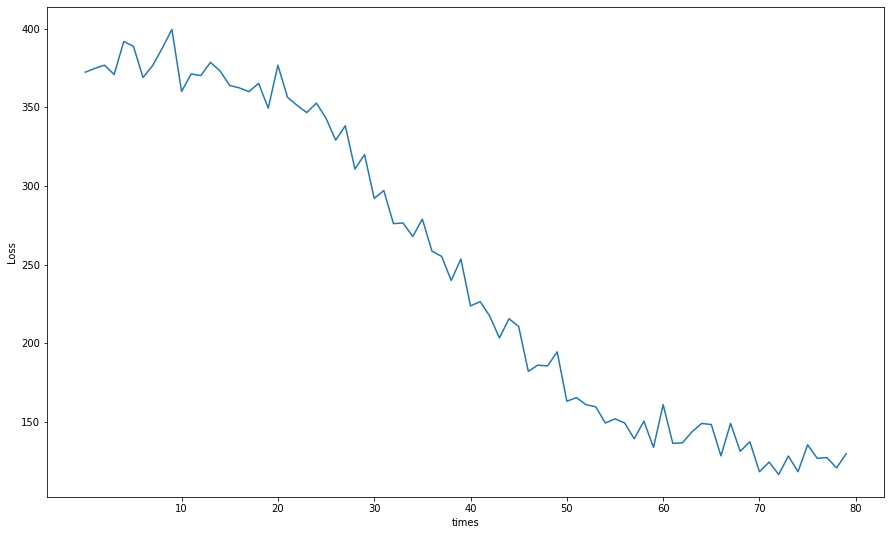

In [70]:
fig = plt.figure(figsize=(15, 10))
# x轴字体倾斜避免重叠
fig.autofmt_xdate()
loss_df = pd.DataFrame(loss_holder, columns=["time", "loss"])
x_times = loss_df["time"].values
plt.ylabel("Loss")
plt.xlabel("times")
plt.plot(loss_df["loss"].values)
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80])
plt.show()

In [71]:
batch_size = 512

# 读取模型
model_path = 'model.ckpt'
model = torch.load(model_path)
# 转化为测试模式
model.eval()
for layer in model.modules():
    layer.requires_grad = False
# 损失函数
criterion = nn.MSELoss()
results = []
targets = []
batches = math.ceil(test_Y.count() / batch_size)
for i in range(batches):
    test_x_data = torch.Tensor(test_X.iloc[i*batch_size:(i+1)*batch_size].values)
    out = model(test_x_data)
    target = torch.Tensor(test_Y.iloc[i*batch_size:(i+1)*batch_size].values)
    if i % 20 == 0:
        results.append(out.squeeze(1))
        targets.append(target)
    loss = criterion(out.squeeze(1), target)
    print('Test Loss: {:.2f}, Mean: {:.2f}, Min: {:.2f}, Max: {:.2f}, Median: {:.2f}, Dealed/Records: {}/{}'.\
         format(math.sqrt(loss/batch_size), out.mean(), out.min(), out.max(), out.median(), (i+1)*batch_size, 
               test_Y.count()))

Test Loss: 115.91, Mean: 7461.51, Min: 4239.74, Max: 13526.70, Median: 7134.80, Dealed/Records: 512/55516
Test Loss: 135.42, Mean: 7547.90, Min: 3739.90, Max: 14719.08, Median: 7100.56, Dealed/Records: 1024/55516
Test Loss: 119.75, Mean: 7381.66, Min: 4153.13, Max: 14019.69, Median: 6976.94, Dealed/Records: 1536/55516
Test Loss: 128.16, Mean: 7561.65, Min: 4147.70, Max: 14580.27, Median: 7205.53, Dealed/Records: 2048/55516
Test Loss: 129.89, Mean: 7467.78, Min: 4019.34, Max: 14401.96, Median: 6939.42, Dealed/Records: 2560/55516
Test Loss: 125.47, Mean: 7590.06, Min: 4153.78, Max: 14748.32, Median: 7164.43, Dealed/Records: 3072/55516
Test Loss: 114.95, Mean: 7357.31, Min: 4306.27, Max: 14957.17, Median: 7060.05, Dealed/Records: 3584/55516
Test Loss: 114.78, Mean: 7592.84, Min: 4072.77, Max: 15578.11, Median: 7211.15, Dealed/Records: 4096/55516
Test Loss: 143.26, Mean: 7514.95, Min: 4125.84, Max: 14654.19, Median: 7092.78, Dealed/Records: 4608/55516
Test Loss: 125.74, Mean: 7498.86, Min:

Test Loss: 131.09, Mean: 7348.43, Min: 3976.97, Max: 14815.60, Median: 7017.83, Dealed/Records: 42496/55516
Test Loss: 122.53, Mean: 7588.31, Min: 4249.63, Max: 14628.60, Median: 7121.38, Dealed/Records: 43008/55516
Test Loss: 112.34, Mean: 7734.45, Min: 4244.38, Max: 15528.96, Median: 7232.65, Dealed/Records: 43520/55516
Test Loss: 118.93, Mean: 7399.34, Min: 3624.00, Max: 15624.62, Median: 6914.81, Dealed/Records: 44032/55516
Test Loss: 137.32, Mean: 7539.65, Min: 4175.51, Max: 14523.60, Median: 7231.02, Dealed/Records: 44544/55516
Test Loss: 132.26, Mean: 7507.75, Min: 3897.37, Max: 15200.94, Median: 7031.72, Dealed/Records: 45056/55516
Test Loss: 132.81, Mean: 7495.51, Min: 3834.57, Max: 14244.37, Median: 7108.07, Dealed/Records: 45568/55516
Test Loss: 112.74, Mean: 7512.37, Min: 3989.16, Max: 15046.78, Median: 7252.07, Dealed/Records: 46080/55516
Test Loss: 138.53, Mean: 7497.77, Min: 4017.48, Max: 14574.83, Median: 7067.12, Dealed/Records: 46592/55516
Test Loss: 124.84, Mean: 752

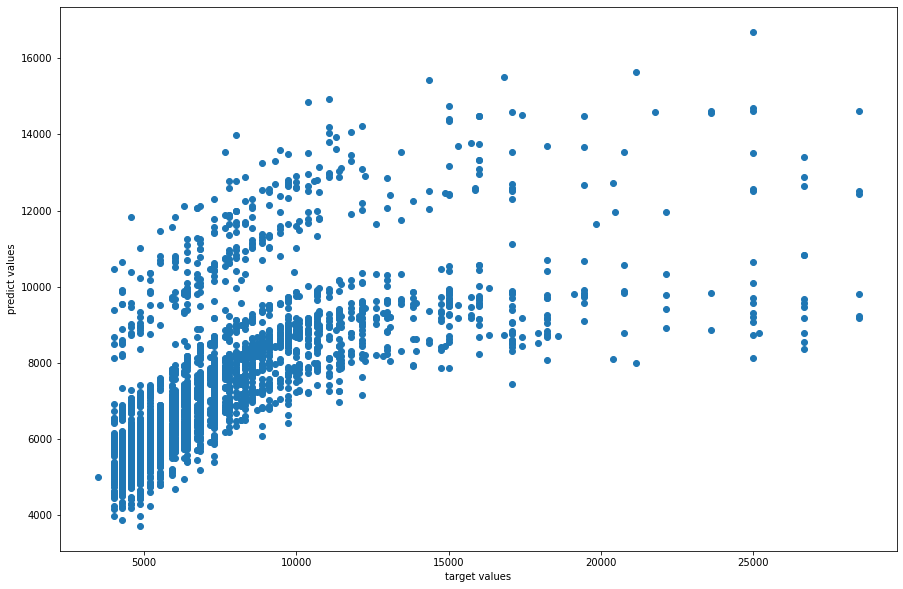

In [72]:
results_flatten = []
targets_flatten = []

[results_flatten.extend(result.detach().numpy().tolist()) for result in results]
[targets_flatten.extend(target.detach().numpy().tolist()) for target in targets]

plt.figure(figsize=(15, 10))
plt.scatter(targets_flatten, results_flatten)
plt.ylabel("predict values")
plt.xlabel("target values")
plt.show()

## 用Pytorch求常见函数的导数

### $y = 6x + b$

In [73]:
x = torch.randn((2, 5), requires_grad=True)
b = 6
y = 6 * x + b
holder_weights = torch.ones((2, 5))
y.backward(holder_weights)
x.grad

tensor([[6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.]])

In [74]:
y.grad_fn

In [75]:
y.grad_fn.next_functions[0][0]

In [76]:
x = torch.randn((2, 5), requires_grad=True)
b = 6
y = 6 * x + b
holder_weights = torch.ones((2, 5)) + 1
y.backward(holder_weights)
x.grad

tensor([[12., 12., 12., 12., 12.],
        [12., 12., 12., 12., 12.]])

### $y = sin(x)$

In [77]:
x = torch.ones((1, 4), requires_grad=True)
y = torch.sin(x)
holder_weights = torch.ones((1, 4))
y.backward(holder_weights)
x.grad

tensor([[0.5403, 0.5403, 0.5403, 0.5403]])

### $y = e^{x}$

In [78]:
x = torch.Tensor([[1, 3], [2, 4]])
x.requires_grad = True
y = torch.pow(math.e, x)
holder_weights = torch.ones_like(y)
y.backward(holder_weights)
x.grad

tensor([[ 2.7183, 20.0855],
        [ 7.3891, 54.5981]])

### $y = x^{e}$

In [79]:
x = torch.Tensor([[1, 3], [2, 4]])
x.requires_grad = True
y = torch.pow(x, math.e)
holder_weights = torch.ones_like(x)
y.backward(holder_weights)
x.grad

tensor([[ 2.7183, 17.9524],
        [ 8.9444, 29.4309]])

### $y = ln(x)$

In [80]:
x = torch.Tensor([[1, 3], [2, 4]])
x.requires_grad = True
y = torch.log(x)
holder_weights = torch.ones_like(x)
y.backward(holder_weights)
x.grad

tensor([[1.0000, 0.3333],
        [0.5000, 0.2500]])

### Sigmoid: $y = \frac{1}{1+e^{-x}}$ 、 $y' = y(1-y)$ 

In [81]:
x = torch.Tensor([[1, 3], [2, 4]])
x.requires_grad = True
y = 1/(1+math.e**(-x))
holder_weights = torch.ones_like(x)
y.backward(holder_weights)
x.grad

tensor([[0.1966, 0.0452],
        [0.1050, 0.0177]])